# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [4]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [5]:
athletes = pd.read_csv("athletes.csv")

In [6]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.


In [59]:
athletes.shape

(11538, 11)

In [10]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [23]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Exercicio 01

In [154]:
# Definir nivel de significancia (alpha)
alpha = 0.05

In [155]:
# Obter amostra da coluna 'height', n=3000. (SEM VALORES NULOS!)
sample_height = get_sample(athletes, 'height', n=3000)

In [156]:
# Obter valor p por shapiro
pvalor = sct.shapiro(sample_height)[1]

In [157]:
pvalor

5.681722541339695e-07

In [158]:
# Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste?
    # Se o pvalor < alpha, então temos evidências de que os dados não vêm de uma distribuição normal.
    # Se o pvalor > alpha, pode ser que os dados vêm de uma distribuição normal.
bool(pvalor > alpha)

False

## Exercicio 02

In [159]:
# Definir nivel de significancia (alpha)
alpha = 0.05

In [160]:
# Obter amostra da coluna 'height', n=3000. (SEM VALORES NULOS!)
sample_height2 = get_sample(athletes, 'height', n=3000)

In [161]:
# Obter valor p por jarque-bera
pvalor2 = sct.jarque_bera(sample_height2)[1]

In [165]:
# Com o teste "JARQUE_BERA", podemos afirmar que as alturas são normalmente distribuídas?
bool(pvalor2 > alpha)

False

## Exercicio 03

In [166]:
# Definir nivel de significancia
alpha = 0.05

In [167]:
# Obter amostra da coluna 'weight', n=3000. (SEM VALORES NULOS!)
sample_weight = get_sample(athletes, 'weight', n=3000)

In [171]:
# Obter pvalor por D'Agostino-Pearson 
pvalor3 = sct.normaltest(sample_weight)[1]

In [173]:
bool(pvalor3 > alpha)

False

## Exercicio 04

In [190]:
# Definir nivel de significancia (alpha)
alpha = 0.05

In [191]:
# Transformacao logaritmica da coluna 'weight'
weight_log = np.log10(sample_weight)

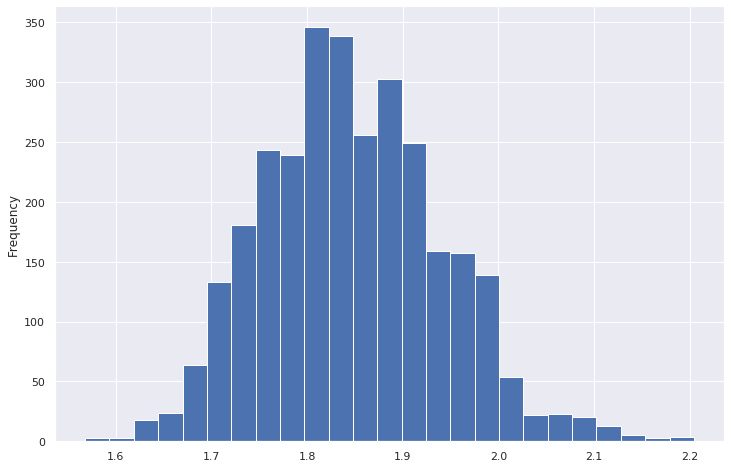

In [192]:
# Enxergando a diferenca entre log e sem log
weight_log.plot.hist(bins=25)

In [193]:
# Obter pvalor (normaltest) após transformação logaritmica
pvalue4 = sct.normaltest(weight_log)[1]

In [196]:
bool(pvalue4 > alpha)

False

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [116]:
def q1():
    # Retorne aqui o resultado da questão 1.

    # Definir nivel de significancia (alpha)
    alpha = 0.05
    # Obter amostra da coluna 'height', n=3000. (SEM VALORES NULOS!)
    sample_height = get_sample(athletes, 'height', n=3000, seed=42)
    # Obter valor p por shapiro
    pvalor = sct.shapiro(sample_height)[1]
    # Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste?
        # Se o pvalor < alpha, então temos evidências de que os dados não vêm de uma distribuição normal.
        # Se o pvalor > alpha, pode ser que os dados vêm de uma distribuição normal.
    return bool(pvalor > alpha)

    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
    * Sim, são condizentes, pois tanto o gráfico como o teste revelam uma curva NÃO normal.
* Plote o qq-plot para essa variável e a analise.
    * 
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).
    * Como o valor-p é extremamente pequeno, não há outronivel de significancia (alpha) que nos de outro resultado.

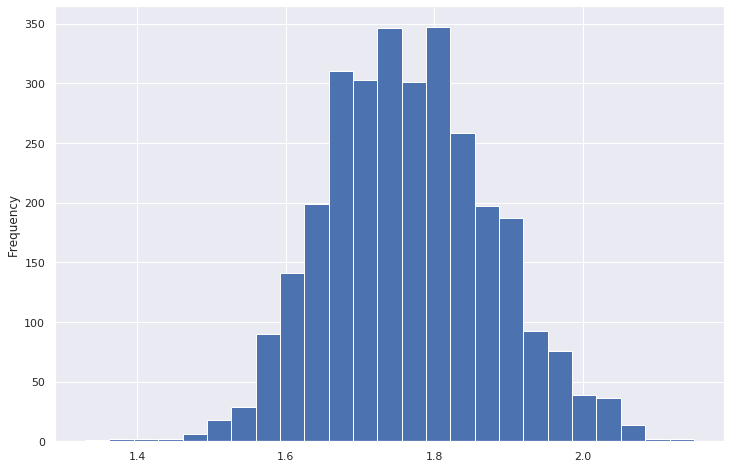

In [126]:
sample_height.plot.hist(bins=25)

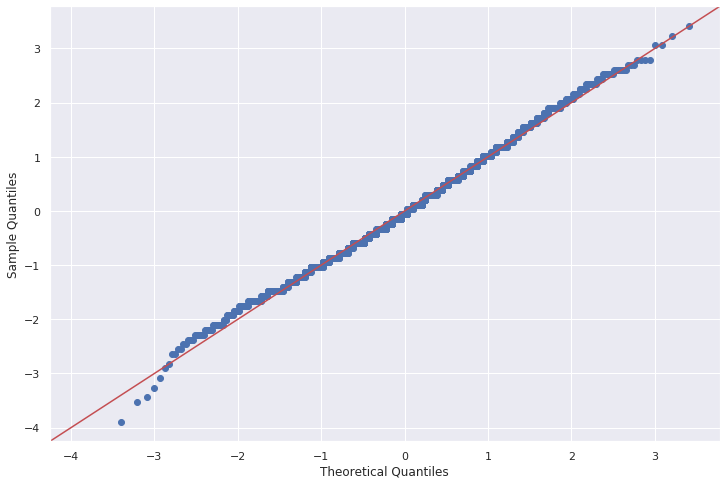

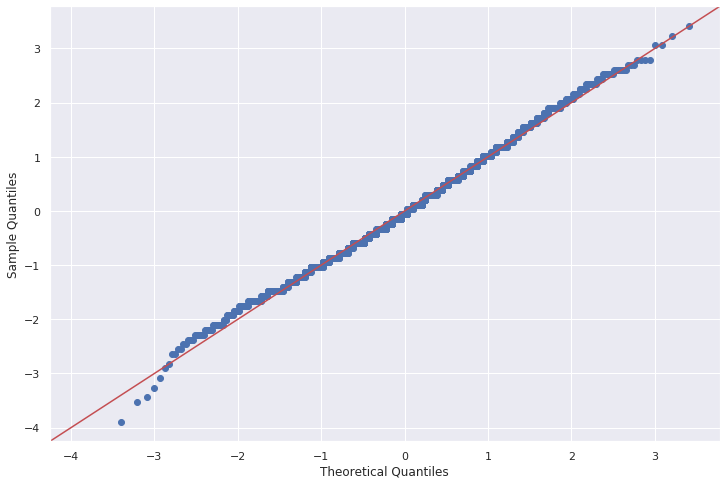

In [80]:
sm.qqplot(sample_height, fit=True, line="45")

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [139]:
def q2():
    # Retorne aqui o resultado da questão 2.
    
    # Definir nivel de significancia (alpha)
    alpha = 0.05
    # Obter amostra da coluna 'height', n=3000. (SEM VALORES NULOS!)
    sample_height2 = get_sample(athletes, 'height', n=3000)
    # Obter valor p por shapiro
    pvalor = sct.jarque_bera(sample_height2)[1]
    # Com o teste "JARQUE_BERA", podemos afirmar que as alturas são normalmente distribuídas?
        # Se o pvalor < alpha, então temos evidências de que os dados não vêm de uma distribuição normal.
        # Se o pvalor > alpha, pode ser que os dados vêm de uma distribuição normal.
    return bool(pvalor > alpha)

    pass

__Para refletir__:

* Esse resultado faz sentido?
* R: O resultado faz sentido, isto é, H0 é rejeitada. Pois, a curtose é menor que 3. Já uma dist. normal possui curtose = 3 e assimetria = 0.

In [144]:
print(f'Skewness (assimetria) = {round(sct.skew(sample_height2),4)}, Kurtosis (curtose) = {round(sct.kurtosis(sample_height2),4)}')

Skewness (assimetria) = 0.1597, Kurtosis (curtose) = -0.0468


## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [8]:
def q3():
    # Retorne aqui o resultado da questão 3.
    
    # Definir nivel de significancia
    alpha = 0.05
    # Obter amostra da coluna 'weight', n=3000. (SEM VALORES NULOS!)
    sample_weight = get_sample(athletes, 'weight', n=3000)
    # Obter pvalor por D'Agostino-Pearson 
    pvalor3 = sct.normaltest(sample_weight)[1]
    # Com o teste "D'Agostino-Pearson", podemos afirmar que os pesos são normalmente distribuídas?
        # Se o pvalor < alpha, então temos evidências de que os dados não vêm de uma distribuição normal.
        # Se o pvalor > alpha, pode ser que os dados vêm de uma distribuição normal.
    return bool(pvalor3 > alpha)

    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
    * R: São condizentes, pois ambos rejeitam H0, isto é, não é uma distribuição normal.
* Um _box plot_ também poderia ajudar a entender a resposta.
    * R:

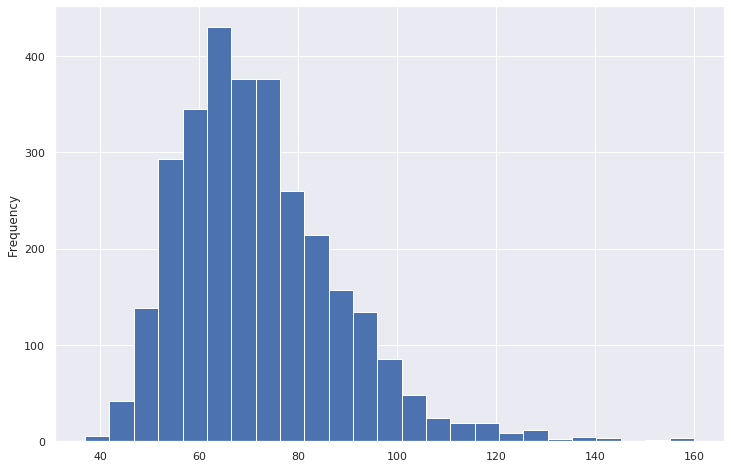

In [174]:
sample_weight.plot.hist(bins=25)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [9]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    # Definir nivel de significancia
    alpha = 0.05
    # Transformacao logaritmica da coluna 'weight'
    weight_log = np.log10(sample_weight)
    # Enxergando a diferenca apos a transformacao
    weight_log.plot.hist(bins=25)
    # Obter pvalor (normaltest) após transformação logaritmica
    pvalue4 = sct.normaltest(weight_log)[1]
    return bool(pvalue4 > alpha)

    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
    * São condizentes, embora o gráfico esteja muito semelhante a uma dist normal (apos a transformação), ainda não é uma dist. normal, pois rejeitamos H0.
* Você esperava um resultado diferente agora?
    * A principio, apos algumas leituras e a visualização do histograma, esperava uma dist normal, contudo o teste disse o contrario.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Inicia sua análise (5, 6 e 7) a partir daqui

## Exercicio 05

In [218]:
# Obter todos os atletas (brasileiros, norte-americanos)
bra = athletes[athletes['nationality'] == 'BRA']
usa = athletes[athletes['nationality'] == 'USA']

In [222]:
# Obter p valor por meio do T-TEST (STUDENT)
# equal_var=False -> Existem variacoes nas populacoes, logo, variavel deve ser falsa!
# nan-policy='omit' -> Ignorar valores nulos no calculo
pvalor5 = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')[1]

In [225]:
# Se o pvalor < alpha, então temos evidências de que os dados não vêm de uma distribuição normal.
# Se o pvalor > alpha, pode ser que os dados vêm de uma distribuição normal.
bool(pvalor5 > 0.05)

False

## Exercicio 06

In [226]:
# Obter todos os atletas (brasileiros, canadenses)
bra = athletes[athletes['nationality'] == 'BRA']
can = athletes[athletes['nationality'] == 'CAN']

In [227]:
# Obter p valor por meio do T-TEST (STUDENT)
pvalor6 = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')[1]

In [228]:
bool(pvalor6 > 0.05)

True

## Exercicio 07


In [ ]:
# Obter todos os atletas (brasileiros, canadenses)
usa = athletes[athletes['nationality'] == 'USA']
can = athletes[athletes['nationality'] == 'CAN']

In [234]:
# Obter p valor por meio do T-TEST (STUDENT)
pvalor7 = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')[1]

In [236]:
round(pvalor7, 8) 

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [10]:
def q5():
    # Retorne aqui o resultado da questão 5.
    
    # Obter todos os atletas (brasileiros, norte-americanos)
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    #Obter p valor por meio do T-TEST (STUDENT)
        # equal_var=False -> Existem variacoes nas populacoes, logo, variavel deve ser falsa!
        # nan-policy='omit' -> Ignorar valores nulos no calculo
    pvalor5 = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')[1]
    # Se o pvalor < alpha, então temos evidências de que os dados não vêm de uma distribuição normal.
    # Se o pvalor > alpha, pode ser que os dados vêm de uma distribuição normal.
    return bool(pvalor5 > 0.05)

    pass

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    # Retorne aqui o resultado da questão 6.

    # Obter todos os atletas (brasileiros, canadenses)
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    # Obter p valor por meio do T-TEST (STUDENT)
    pvalor6 = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')[1]
    return bool(pvalor6 > 0.05)
    
    pass

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [238]:
def q7():
    # Retorne aqui o resultado da questão 7.

    # Obter todos os atletas (brasileiros, canadenses)
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    # Obter p valor por meio do T-TEST (STUDENT)
    pvalor7 = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')[1]
    return float(round(pvalor7, 8))

    pass

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?